<a href="https://colab.research.google.com/github/preeyam2000sahu/Facial_Expreesion_Classifier/blob/main/FacialExpressionClassifierCNN_NNFL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import numpy as np 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
def normalize_inputs(X_train,X_test):
  return np.divide(X_train,255.0),np.divide(X_test,255.0)

In [ ]:
df=pd.read_csv('drive/My Drive/train.csv',header=0,index_col=False)

In [ ]:
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [ ]:
df['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
34882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
34883    178 174 172 173 181 188 191 194 196 199 200 20...
34884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
34885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
34886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 34887, dtype: object

In [ ]:
temp_list=[]
for i in range (len(df['pixels'])):
    temp_list.append(np.reshape(np.array([float(x) for x in df['pixels'][i].split()]),newshape=(48,48,1)))

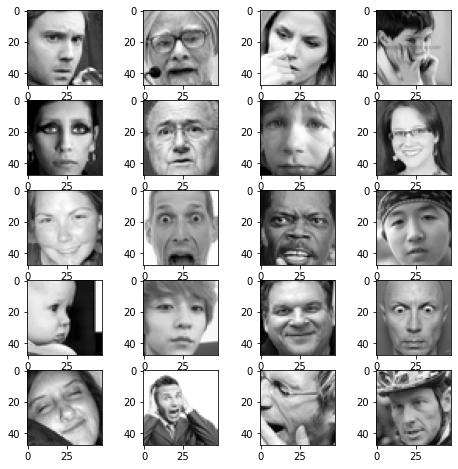

In [ ]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0,columns*rows):
    img = temp_list[i][:,:,0]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap='gray')
plt.show()


    

In [ ]:
X=np.array(temp_list)
Y=df['emotion']
y=tf.one_hot(Y,depth=7)
print (X.shape)

(34887, 48, 48, 1)


In [ ]:
#best result with batch size 8192
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(48,48,1),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(1,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2),strides=(1,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu',),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(7,activation='softmax')    
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 128)      

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [ ]:
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05,
    rotation_range=10,
    horizontal_flip=True,
    rescale=1./255,
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)
train_generator=train_datagen.flow(X_train,Y_train,batch_size=256,shuffle=True)
val_generator=test_datagen.flow(X_test,Y_test,batch_size=256)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_gen=model.fit_generator(train_generator,epochs=250,verbose=1,validation_data=val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/250
123/123 [==============================] - 13s 102ms/step - loss: 1.8766 - accuracy: 0.2304 - val_loss: 1.8776 - val_accuracy: 0.2462
Epoch 2/250
123/123 [==============================] - 12s 98ms/step - loss: 1.7276 - accuracy: 0.2959 - val_loss: 1.9980 - val_accuracy: 0.3032
Epoch 3/250
123/123 [==============================] - 12s 96ms/step - loss: 1.5423 - accuracy: 0.3849 - val_loss: 2.6512 - val_accuracy: 0.2542
Epoch 4/250
123/123 [==============================] - 12s 96ms/step - loss: 1.4439 - accuracy: 0.4367 - val_loss: 1.5000 - val_accuracy: 0.4408
Epoch 5/250
123/123 [==============================] - 12s 96ms/step - loss: 1.3633 - accuracy: 0.4733 - val_loss: 1.6229 - val_accuracy: 0.4079
Epoch 6/250
123/123 [==============================] - 12s 96ms/step - loss: 1.3093 - accuracy: 0.5012 - val_loss: 1.4343 - val_accuracy: 0.4569
Epoch 7/250
123/123 [==============================] - 12s 96ms/step - loss: 1.2664 - accuracy: 0.5157 - val_loss: 1.4042 - val_a

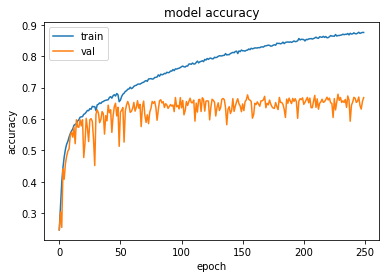

In [ ]:
 plt.plot(history_gen.history['accuracy'])
plt.plot(history_gen.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('drive/My Drive/graph1.png')
plt.show()

In [ ]:
history=model.fit_generator(train_generator,epochs=200,verbose=1,validation_data=val_generator)

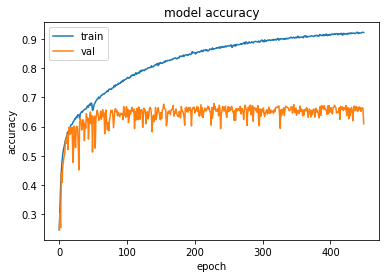

In [ ]:
plt.plot(history_gen.history['accuracy']+history.history['accuracy'])
plt.plot(history_gen.history['val_accuracy']+history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('drive/My Drive/graph.png')
plt.show()


In [ ]:
X_train,X_test=normalize_inputs(X_train,X_test)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2)])
print ("Metrics used are loss, accuracy and top 2 accuracy")
print ("Train")
score = model.evaluate(X_train,Y_train, verbose=0)
for i in range(len(score)):
    print("%s: %f" % (model.metrics_names[i], score[i]))
print ("Test")
score = model.evaluate(X_test,Y_test, verbose=0)
for i in range(len(score)):
    print("%s: %f" % (model.metrics_names[i], score[i]))

Metrics used are loss, accuracy and top 2 accuracy
Train
loss: 0.117268
accuracy: 0.957641
sparse_top_k_categorical_accuracy: 0.995254
Test
loss: 1.653531
accuracy: 0.670393
sparse_top_k_categorical_accuracy: 0.824305


In [ ]:
model.save("drive/My Drive/modelfinal.h5")
model.save_weights("drive/My Drive/modelfinalweights.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
loaded_model=tf.keras.models.load_model("drive/My Drive/modelfinal.h5")
loaded_model.load_weights("drive/My Drive/modelfinalweights.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_40 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 10, 10, 128)      

In [ ]:
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print (X_test.shape)
score =loaded_model.evaluate(val_generator,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

(3489, 48, 48, 1)
accuracy: 67.04%


In [ ]:
score = loaded_model.evaluate(train_generator,verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

123/123 [==============================] - 10s 83ms/step - loss: 0.1029 - accuracy: 0.9636
accuracy: 96.36%
